# Early Insight fromTextual Data

This assignment conducts a detailed analysis of an Amazon reviews dataset. It begins by loading the data, displaying initial observations, and examining the dataset's structure and missing values. It adds a 'length' column to capture review lengths and converts text columns to uppercase. The code processes text by tokenizing and removing stopwords, then analyzes token frequencies. It visualizes the review lengths, their distribution across ratings, and the most common tokens using plots and word clouds. The workflow integrates data cleaning, text preprocessing, statistical analysis, and visualization using pandas, matplotlib, seaborn, and wordcloud libraries.

In [65]:
#import pandas and read the file and display the first 20 observations.
import pandas as pd
file = "C:\\Users\\DELL\\Desktop\\amazon_reviews.csv"
df = pd.read_csv(file)
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0


# overview of the data

In [66]:
#df = df.sample(frac=0.2) used to fraction the dataset 
df.shape
#gives the shape of the dataset

(4915, 12)

In [67]:
#display the coloumns of the dataset
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff',
       'helpful_yes', 'total_vote'],
      dtype='object')

In [68]:
#display the types of dataset
df.dtypes

reviewerID         object
asin               object
reviewerName       object
helpful            object
reviewText         object
overall           float64
summary            object
unixReviewTime      int64
reviewTime         object
day_diff            int64
helpful_yes         int64
total_vote          int64
dtype: object

In [69]:
#display the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


# Length of speeches

In [70]:
#creating a coloumn called length and inserting the length of the coloumn "reviewText" in length coloumn and then describe
df['length'] = df['reviewText'].str.len()
df.describe()

,overall,unixReviewTime,day_diff,helpful_yes,total_vote,length
count,4915.000000,4.915000e+03,4915.000000,4915.000000,4915.000000,4914.000000
mean,4.587589,1.379465e+09,437.367040,1.311089,1.521465,267.747456
std,0.996845,1.581857e+07,209.439871,41.619161,44.123095,328.864594
min,1.000000,1.339200e+09,1.000000,0.000000,0.000000,3.000000
25%,5.000000,1.365898e+09,281.000000,0.000000,0.000000,123.000000
50%,5.000000,1.381277e+09,431.000000,0.000000,0.000000,172.000000
75%,5.000000,1.392163e+09,601.000000,0.000000,0.000000,289.000000
max,5.000000,1.406074e+09,1064.000000,1952.000000,2020.000000,8638.000000


# Stats about text fields

In [71]:
# Generate a summary of descriptive statistics for categorical (object-type) columns in the DataFrame
df.describe(include='O')

,reviewerID,asin,reviewerName,helpful,reviewText,summary,reviewTime
count,4915,4915,4914,4915,4914,4915,4915
unique,4915,1,4594,42,4912,3885,690
top,A3SBTW3WS4IQSN,B007WTAJTO,Amazon Customer,"[0, 0]",No issues.,Five Stars,2013-12-30
freq,1,4915,121,4360,2,46,26


# Check for missing data

In [72]:
#checking for null values
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
length            1
dtype: int64

# Let us fill the missing data

In [74]:
## Fill missing values with the string 'unknown'
df['reviewerName'].fillna('unknown', inplace=True)
df['reviewText'].fillna('unknown', inplace=True)
df['length'].fillna('0', inplace=True)
#check the null values again
df.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
length            0
dtype: int64

# Now uppercase (or lowercase) all text

In [75]:
#convert to upper case
df['reviewerName'] = df['reviewerName'].str.upper()
df['reviewText'] = df['reviewText'].str.upper()
df['summary'] = df['summary'].str.upper()

In [78]:
#printing all observation in 'reviewerName' coloumn which contains AARON.
df[df['reviewerName'].str.contains('AARON')]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,length
14,A3EA7KGYC8LB0,B007WTAJTO,"AARON ""AARON""","[0, 0]",HEARD THAT THE CARD'S WRITE SPEED IS INSUFFICI...,5.0,USE IT FOR MY GOPRO HERO 3+ BLACK,1392595200,2014-02-17,294,0,0,128.0
15,A29RI184HRX66H,B007WTAJTO,"AARON ""AARON""","[0, 0]",I BOUGHT THIS TO USE WITH MY GO PRO HERO 3 BLA...,5.0,"AWESOME PRICE, GREAT BRAND NAME",1357257600,2013-04-01,616,0,0,287.0
16,A2G9ZHVA6IOGBY,B007WTAJTO,AARON ALVAREZ,"[0, 0]",GOT THIS BECAUSE I HAD A 2 GB ONE THAT FILLED ...,5.0,GREAT PRICE. FAST,1393718400,2014-02-03,308,0,0,380.0
17,A1OATGH4DF0RF0,B007WTAJTO,AARON F. VIRGINIE,"[0, 1]",CLASS 10 SPEED RATING FOR SEAMLESS FULL HD VID...,5.0,GET FAST LOAD TIMES,1372896000,2013-04-07,610,0,1,1265.0
18,A1V6CQACZ9IOLC,B007WTAJTO,AARON GRAVES,"[0, 0]",THE READ AND WRITE SPEEDS ARE BETTER THAN THE ...,5.0,VERY GOOD LITTLE MICRO SD CARD,1398988800,2014-02-05,306,0,0,282.0
19,A2ELBSIZ26GKM2,B007WTAJTO,AARON,"[0, 0]",THIS WORKS WITH THE NL1520. NO VIDEO STUTTERI...,5.0,WORKS,1389052800,2014-07-01,160,0,0,110.0
20,A6AL9BZ0JALUP,B007WTAJTO,AARON,"[0, 0]",WORKS AS EXPECTED. HIGH TRANSFER SPEED. NICE...,5.0,WORKS,1382832000,2013-10-27,407,0,0,292.0
21,A80SHWURCS1KD,B007WTAJTO,AARON,"[0, 0]",WORKS GREAT IN A SAMSUNG GALAXY S3. FORMATTED...,5.0,GOOD WITH GALAXY S3,1388275200,2013-12-29,344,0,0,219.0
22,ATSVUBE2115N1,B007WTAJTO,AARON MADDEN,"[0, 0]",SANDISK NEVER DISAPPOINTS. AS ALWAYS SANDISK P...,5.0,NEVER DISAPPOINTS,1383609600,2013-05-11,576,0,0,156.0
23,A3R54B4AFAV3PD,B007WTAJTO,AARON MCKAIG,"[0, 0]","GOOD PRICE, WORKS FLAWLESS IN MY SAMSUNG S4! N...",5.0,GREAT,1396569600,2014-04-04,248,0,0,123.0


In [82]:
df['length'] = pd.to_numeric(df['length'], errors='coerce')

# plotting a plot for length

<Axes: >

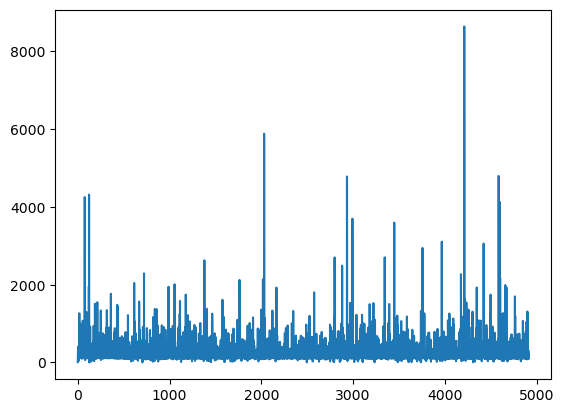

In [83]:
#we are plotting a plot for the coloumn length
df['length'].plot()

<Axes: >

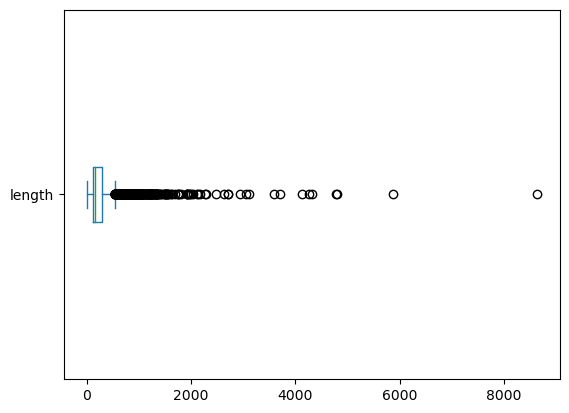

In [84]:
#we are plotting a box plot for the coloumn length
df['length'].plot(kind='box', vert=False)

<Axes: ylabel='Frequency'>

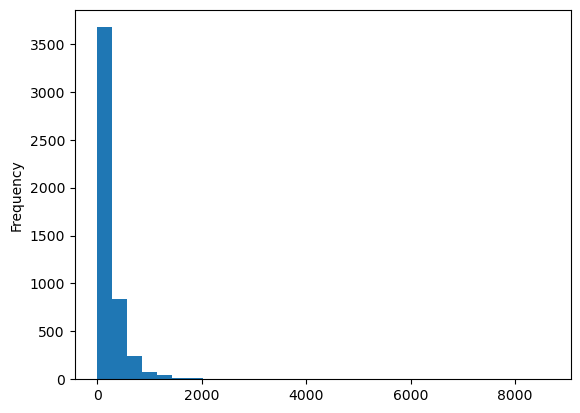

In [85]:
#we are plotting a histogram for the coloumn length
df['length'].plot(kind='hist', bins=30)

# Bar plot

C:\Users\DELL\anaconda3\1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


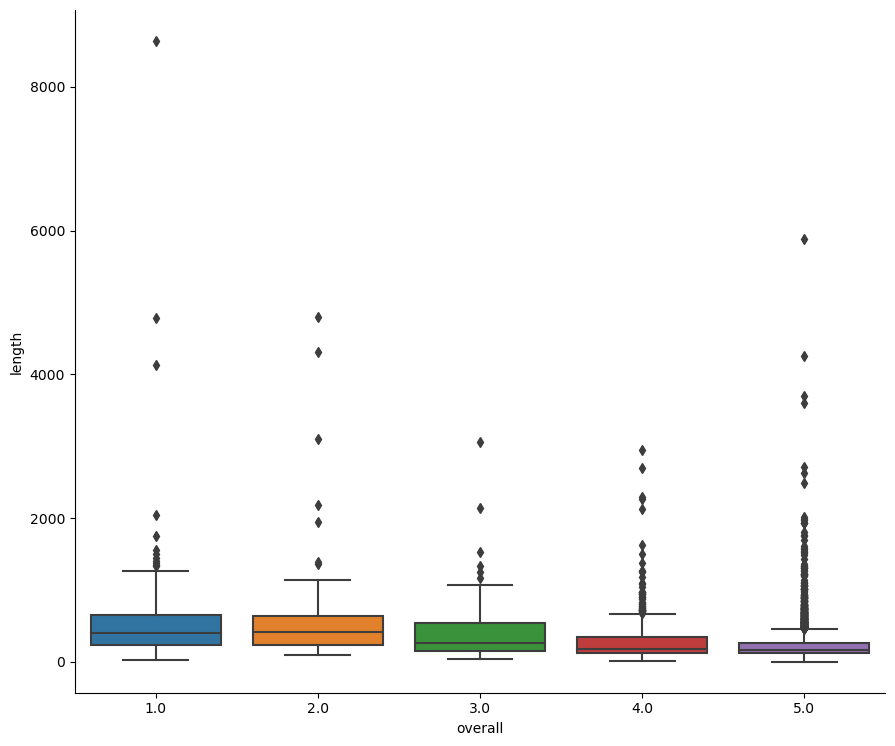

In [114]:
# Convert 'length' column to numeric
df['length'] = pd.to_numeric(df['length'], errors='coerce')

# Filter rows where 'overall' column contains specific values
where = df['overall'].isin([5.0, 4.0, 3.0, 2.0, 1.0])

# Create a boxplot for 'length' distribution by 'overall' rating
g = sns.catplot(data=df[where], x="overall", y="length", kind='box')

# Set the size of the plot
g.fig.set_size_inches(10, 8)


# Function to tokenize

In [90]:
#Function to tokenize
import regex as re
def tokenize(text):
    # Use regular expression to find all occurrences of the pattern in the text
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [91]:
#Sample text for testing the tokenize function testtext
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov"
#we are tokenizing the testtext and storing in testtokens
testtokens = tokenize(testtext)
print(testtokens)

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


# Remove stop words

In [92]:
#Import the Natural Language Toolkit (nltk) library
import nltk
# Download the list of stopwords
nltk.download('stopwords')
# A set is used for faster search performance compared to a list
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'up', "mustn't", "needn't", 'after', 'with', 'out', 'o', 'was', 'couldn', 'are', 'very', 'against', 'wouldn', 'for', 'were', 'myself', 'her', 'each', 'between', 'can', "won't", 'at', 'above', "mightn't", "you'd", 'ours', 've', "couldn't", 'yours', 'then', 'how', 'isn', 'my', 'our', 'or', 'shouldn', 'it', 'nor', 'the', 'all', 'his', 'he', 'have', 'having', 'any', 'on', 'there', 'won', 'be', 'no', 'its', 'should', 'off', "you've", 'just', 'down', 'some', 'by', 'ma', 'haven', 'wasn', "you'll", 'only', 'mustn', 'doing', 'from', 'under', 'before', 'do', 'again', 'weren', 'as', 't', 're', 'when', 'who', 'because', 'we', 'your', 'and', 'over', 'now', 'she', "it's", 'will', "hasn't", 'whom', 'same', 'am', 'these', 'about', 'did', 'mightn', 'but', 'yourselves', 'me', 'hers', 'what', "wasn't", 'i', 'so', "weren't", 'why', 'is', 'they', "wouldn't", 'been', "didn't", 'most', 'aren', 'd', 'more', 'during', 'where', 'that', 'has', 'an', 'itself', 'in', 'them', "shan't", "should've", 'm', 'hadn', 't

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Function to remove stop words

In [93]:
#function to remove stopwords from a list of tokens
def remove_stop(tokens):
    #create a new list of tokens that are not in the stopwords set
    return [t for t in tokens if t.lower() not in stopwords]
#Just testing it
cleantokens= remove_stop(testtokens)
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


# pipeline

In [94]:
#creating a pipeline
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    # Apply each function in the pipeline to the text
    for fun in pipeline:
        tokens = fun(tokens)
    #return processed text
    return tokens

# Run the pipeline

In [96]:
# Process text and save tokens in a new column
df['tokens'] = df['reviewText'].apply(prepare, pipeline=pipeline)

# Count the tokens

In [97]:
# Count tokens per row
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,length,tokens,num_tokens
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I BOUGHT THIS SANDISK 16GB CLASS 10 TO USE WIT...,1.0,DO NOT WASTE YOUR MONEY.,1374537600,2013-07-23,503,0,0,320.0,"[bought, sandisk, 16gb, class, use, htc, inspi...",34
4911,ALGDLRUI1ZPCS,B007WTAJTO,ZO,"[0, 0]",USED THIS FOR EXTENDING THE CAPABILITIES OF MY...,5.0,GREAT ITEM!,1377129600,2013-08-22,473,0,0,148.0,"[used, extending, capabilities, samsung, galax...",13
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S LISKE,"[0, 0]",GREAT CARD THAT IS VERY FAST AND RELIABLE. IT ...,5.0,FAST AND RELIABLE MEMORY CARD,1396224000,2014-03-31,252,0,0,233.0,"[great, card, fast, reliable, comes, optional,...",22
4913,A37E6P3DSO9QJD,B007WTAJTO,Z TAYLOR,"[0, 0]",GOOD AMOUNT OF SPACE FOR THE STUFF I WANT TO D...,5.0,GREAT LITTLE CARD,1379289600,2013-09-16,448,0,0,91.0,"[good, amount, space, stuff, want, fits, gopro...",8
4914,A8KGFTFQ86IBR,B007WTAJTO,ZZA,"[0, 0]",I'VE HEARD BAD THINGS ABOUT THIS 64GB MICRO SD...,5.0,SO FAR SO GOOD.,1388620800,2014-02-01,310,0,0,199.0,"[heard, bad, things, 64gb, micro, sd, card, cr...",21


# Word frequency Analysis

In [107]:
# Import the Counter class from collections
from collections import Counter
#tokenize one example
tokens = tokenize("The cat jumped over the fence, but the cat couldn't make it.")
# Count occurrences of each token
testcount= Counter(tokens)
print(testcount)

Counter({'cat': 2, 'the': 2, 'The': 1, 'jumped': 1, 'over': 1, 'fence': 1, 'but': 1, 'couldn': 1, 't': 1, 'make': 1, 'it': 1})


# Add new data to the current count

In [108]:
# Tokenize another sentence
more_tokens = tokenize("The cat jumped over the fence.")
# Update counts with new tokens
testcount.update(more_tokens)
# Print updated token frequencies
print(testcount)

Counter({'cat': 3, 'the': 3, 'The': 2, 'jumped': 2, 'over': 2, 'fence': 2, 'but': 1, 'couldn': 1, 't': 1, 'make': 1, 'it': 1})


In [109]:
# Initialize an empty Counter object
counter = Counter()
# Update counter with tokens from each row
df['tokens'].map(counter.update)
#Print the five most common tokens
print(counter.most_common(5))

[('card', 4712), ('phone', 1776), ('works', 1585), ('great', 1480), ('memory', 1372)]


# word frequency in it’s own dataframe for analysis

In [110]:
# Convert counter to DataFrame with frequencies
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
# Filter rows where frequency is at least 1
freq_df = freq_df.query('freq >= 1')
# Set the DataFrame index name to 'token'
freq_df.index.name = 'token'

# Sort and display

In [111]:
# Sort DataFrame by frequency in descending order and display top 10 entries
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
card,4712
phone,1776
works,1585
great,1480
memory,1372
sandisk,1335
sd,1212
use,1124
one,1096


In [112]:
# descriptive statistics for the frequency DataFrame
freq_df.describe()

,freq
count,8452.000000
mean,14.678064
std,84.437568
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,4712.000000


# Bar chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

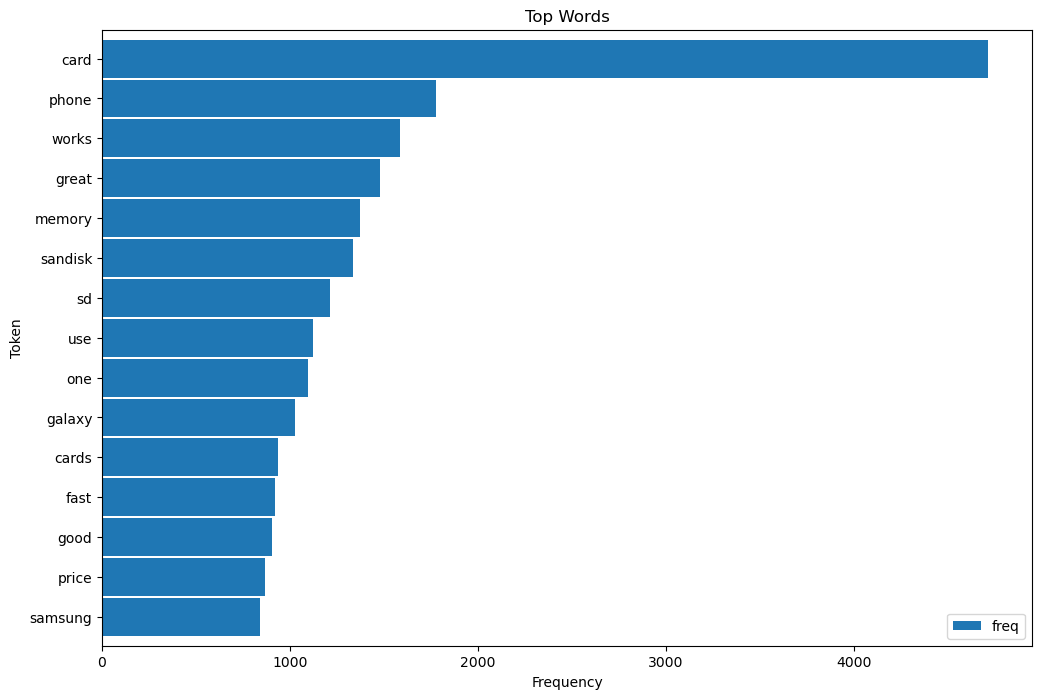

In [113]:
# Plot the top 15 most frequent tokens as a horizontal bar chart
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
# Invert the y-axis to show the highest values at the top
ax.invert_yaxis()
# Set labels and title for the chart
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

In [117]:
#comment wordcloud
!pip install wordcloud

# Word cloud

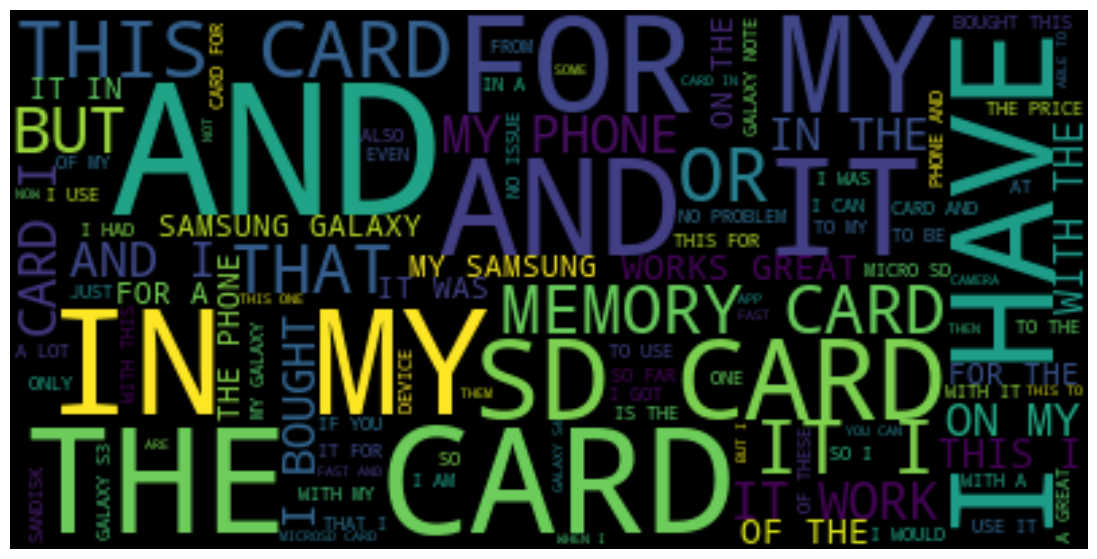

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all review texts into a single string
all_reviews = ' '.join(df['reviewText'])
# Define stopwords if not already defined
stopwords = set()
# Set figure size
plt.figure(figsize=(14, 7)) 
# Initialize a WordCloud object with up to 100 words, excluding stopwords
wc = WordCloud(max_words=100, stopwords=stopwords)
# Generate the word cloud from the combined review text
wc.generate(all_reviews)
# Display the word cloud using bilinear interpolation
plt.imshow(wc, interpolation='bilinear')
# Hide axes for a cleaner visualization
plt.axis("off")
# Show the plot
plt.show()

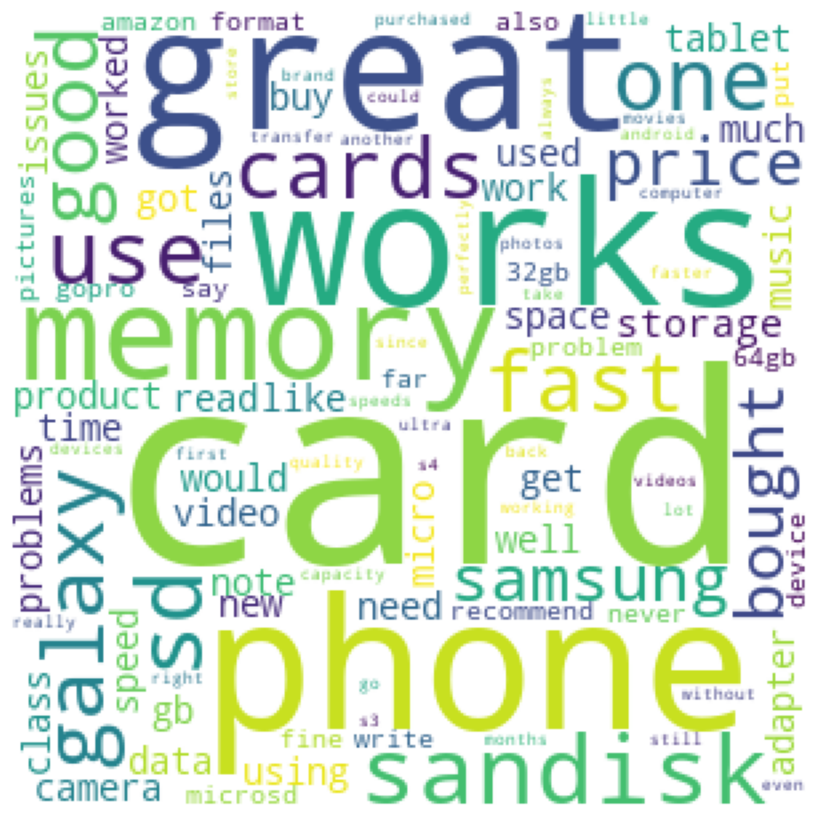

In [121]:
# Initialize WordCloud with specific dimensions and properties
wc = WordCloud(background_color='white', width = 300, height=300,max_words=100, margin=2)
# Generate word cloud using frequencies from the dataframe
wc.fit_words(freq_df['freq'].to_dict() )
# Set up the figure 
plt.figure(figsize = (8, 8), facecolor = None)
# Display the word cloud image
plt.imshow(wc)
plt.axis("off")
# Adjust layout to eliminate extra padding
plt.tight_layout(pad = 0)
#show the plot
plt.show()